# Heating adobe houses

- final output: temp vs time of the day plot for different seasons with external/internal air/surface
- ideal thickness as a function of time for an year
$$
C = c \times \text{Area} \times t = kt\\
\Delta T_\text{avg} = k'/t
$$

Consider the 1D heat equation for a rod of length $L$,

$$
\frac{\partial T}{\partial t} = D\frac{\partial^2 T}{\partial x^2} 
$$

This is a parabolic PDE. Using discretization, we can numerically solve this PDE using finite difference approximation.
Here, by discretising the rod into N nodes, we can numerically model how the temperature profile varies between the nodes. Here, $\Delta x$ is the length between each node.
For the time derivative part of the heat equation, we will discretise time into chunks of $\Delta t$. For the stability of ???,

$$  
\Delta t \le \frac{1}{2}\frac{(\Delta x)^2}{D}
$$

Using the finite difference approximations for the first and second derivatives,

$$
\frac{T_{(t+1,\,x)}-T_{(t,\,x)}}{\delta t} = D\frac{T_{(t,\,x+1)}-2T_{(t,\,x)}+T_{(t,\,x-1)}}{(\delta x)^2}
$$

Next, we define the boundary values at the ends of the rod for any $t$ as well as the initial temperature profile for the rod when $t=0$.

For the 2D case, we can extend the rod analogy by considering a grid of $n$ nodes in both $x$ and $y$ axes. The diffusion equation becomes,

$$  
\frac{\partial T}{\partial t} = D\left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}\right)
$$

$$  
\frac{\partial T}{\partial t} = D\left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2}\right)$$
$$
D=\frac{k}{c_p\rho}
$$

And the second derivative in $y$ gets appended to our working formula as,

$$
\frac{T_{(t+1,\,x,\,y)}-T_{(t,\,x,\,y)}}{\Delta t} = D\left(\frac{T_{(t,\,x+1,\,y)}-2T_{(t,\,x,\,y)}+T_{(t,\,x-1,\,y)}}{(\Delta x)^2}+\frac{T_{(t,\,x,\,y+1)}-2T_{(t,\,x,\,y)}+T_{(t,\,x,\,y-1)}}{(\Delta y)^2}\right)
$$

where

$$
\Delta t \le \min \left(\frac{(\Delta x)^2}{4D}, \frac{(\Delta y)^2}{4D}\right)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [25]:
t = np.linspace(0,1,10)
x = np.linspace(0,1,10)
dt = t[1]-t[0]
dx = x[1]-x[0]

In [27]:
# The next two lines build two parameters that are of interest
# for the finite difference scheme.
D = 0.5 # The diffusion coefficient for the heat equation given.
# The coefficient "a" appears in the finite difference scheme.
a = D*dt / dx**2
print("dt=",dt,", dx=",dx," and D dt/dxˆ2=",a)

dt= 0.1111111111111111 , dx= 0.1111111111111111  and D dt/dxˆ2= 4.5


In [28]:
U = np.zeros( (len(t),len(x)) )
U[:,0] = 0 # left boundary condition
U[:,-1] = 0 # right boundary condition
U[0,:] = np.sin(2*np.pi*x)# the function for the init. condition (should depend on x)

In [29]:
for n in range(len(t)-1):
    U[n+1,1:-1] = U[n,1:-1] + a*( U[n,2:] - 2*U[n,1:-1] + U[n,:-2])

In [30]:
def plotter(Frame):
    plt.plot(x,U[Frame,:],'b')
    plt.grid()
    plt.ylim(-1,1)
    plt.show()
interactive_plot = interactive(plotter, Frame=(0,len(t)-1,1))
interactive_plot

interactive(children=(IntSlider(value=4, description='Frame', max=9), Output()), _dom_classes=('widget-interac…

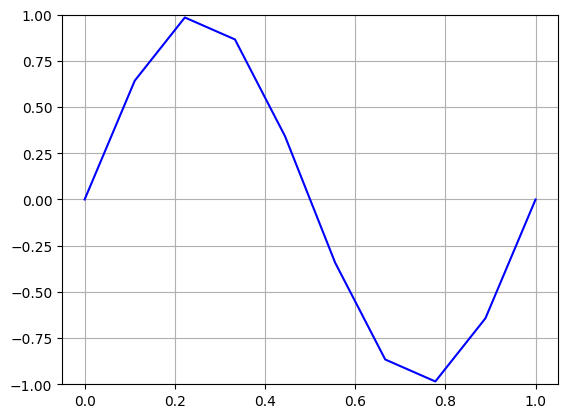

In [31]:
for Frame in range(0,len(t),20): # ex: build every 20th frame
    plotter(Frame)

In [ ]:
a = 110
length = 50 #mm
time = 4 #seconds
nodes = 40

# Initialization 

dx = length / (nodes-1)
dy = length / (nodes-1)

dt = min(   dx**2 / (4 * a),     dy**2 / (4 * a))

t_nodes = int(time/dt) + 1

u = np.zeros((nodes, nodes)) + 20 # Plate is initially as 20 degres C

# Boundary Conditions 

u[0, :] = np.linspace(0, 100, nodes)
u[-1, :] = np.linspace(0, 100, nodes)

u[:, 0] = np.linspace(0, 100, nodes)
u[:, -1] = np.linspace(0, 100, nodes)

# Visualizing with a plot

fig, axis = plt.subplots()

pcm = axis.pcolormesh(u, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=axis)

# Simulating

counter = 0

while counter < time :

    w = u.copy()

    for i in range(1, nodes - 1):
        for j in range(1, nodes - 1):

            dd_ux = (w[i-1, j] - 2*w[i, j] + w[i+1, j])/dx**2
            dd_uy = (w[i, j-1] - 2*w[i, j] + w[i, j+1])/dy**2

            u[i, j] = dt * a * (dd_ux + dd_uy) + w[i, j]

    counter += dt

    print("t: {:.3f} [s], Average temperature: {:.2f} Celcius".format(counter, np.average(u)))

    # Updating the plot

    pcm.set_array(u)
    axis.set_title("Distribution at t: {:.3f} [s].".format(counter))
    plt.pause(0.01)


plt.show()

